<a href="https://colab.research.google.com/github/shivampatel057/wastedata-Mask_RCNN-multiple-classes/blob/main/CNN_4_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [ ]:
!wget --no-check-certificate \
    https://github.com/shivampatel057/lisfranccnn/raw/main/train.zip \
    -O /tmp/train.zip

--2021-02-17 21:45:38--  https://github.com/shivampatel057/lisfranccnn/raw/main/train.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shivampatel057/lisfranccnn/main/train.zip [following]
--2021-02-17 21:45:38--  https://raw.githubusercontent.com/shivampatel057/lisfranccnn/main/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17863078 (17M) [application/zip]
Saving to: ‘/tmp/train.zip’

/tmp/train.zip      100%[===================>]  17.04M  39.6MB/s    in 0.4s    

2021-02-17 21:45:39 (39.6 MB/s) - ‘/tmp/train.zip’ saved [17863078/17863078]



In [ ]:
!wget --no-check-certificate \
    https://github.com/shivampatel057/lisfranccnn/raw/main/valid.zip \
    -O /tmp/valid.zip

--2021-02-17 21:45:39--  https://github.com/shivampatel057/lisfranccnn/raw/main/valid.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shivampatel057/lisfranccnn/main/valid.zip [following]
--2021-02-17 21:45:39--  https://raw.githubusercontent.com/shivampatel057/lisfranccnn/main/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2879408 (2.7M) [application/zip]
Saving to: ‘/tmp/valid.zip’

/tmp/valid.zip      100%[===================>]   2.75M  --.-KB/s    in 0.1s    

2021-02-17 21:45:40 (19.8 MB/s) - ‘/tmp/valid.zip’ saved [2879408/2879408]



In [ ]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

local_zip = '/tmp/valid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

zip_ref.close()

In [ ]:
train_injured_dir = os.path.join('/tmp/train/injured')
train_intact_dir = os.path.join('/tmp/train/intact')

valid_injured_dir = os.path.join('/tmp/valid/injured')
valid_intact_dir = os.path.join('/tmp/valid/intact')

In [ ]:
train_injured_names = os.listdir(train_injured_dir)
print(train_injured_names[:10])

train_intact_names = os.listdir(train_intact_dir)
print(train_intact_names[:10])

validation_injured_names = os.listdir(valid_injured_dir)
print(validation_injured_names[:10])

validation_intact_names = os.listdir(valid_intact_dir)
print(validation_intact_names[:10])

['171.jpg', '190.jpg', '134.jpg', '163.jpg', '220.jpg', '31.jpg', '144.jpg', '211.jpg', '5.jpg', '2.jpg']
['117.jpg', '171.jpg', '302.jpg', '80.jpg', '134.jpg', '163.jpg', '31.jpg', '113.jpg', '144.jpg', '98.jpg']
['1045.jpg', '1158.jpg', '1009.jpg', 'in181.jpg', '1203.jpg', 'in22.jpg', 'in3.jpg', '1201.jpg', 'in195.jpg', '1046.jpg']
['nl87.jpg', 'nl394.jpg', '133.jpg', '27.jpg', '71.jpg', '37.jpg', 'nl75.jpg', 'nl15.jpg', '143.jpg', 'nl391.jpg']


In [ ]:
print('total training injured images:', len(os.listdir(train_injured_dir)))
print('total training intact images:', len(os.listdir(train_intact_dir)))
print('total validation injured images:', len(os.listdir(valid_injured_dir)))
print('total validation intact images:', len(os.listdir(valid_intact_dir)))

total training injured images: 126
total training intact images: 169
total validation injured images: 25
total validation intact images: 25


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

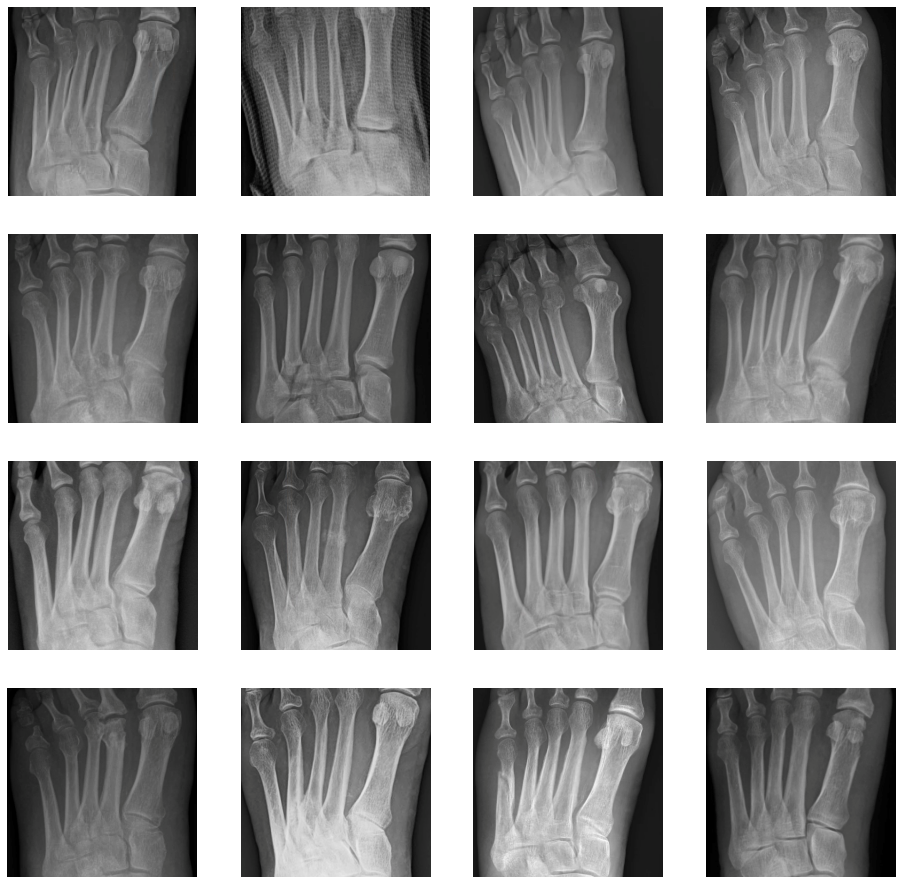

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_injured_pic = [os.path.join(train_injured_dir, fname) 
                for fname in train_injured_names[pic_index-8:pic_index]]
next_intact_pic = [os.path.join(train_intact_dir, fname) 
                for fname in train_intact_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_injured_pic + next_intact_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/tmp/train/',  
        classes = ['injured', 'intact'],
        target_size=(256, 256), 
        batch_size=16,
        
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/valid/',  
        classes = ['injured', 'intact'],
        target_size=(256, 256),  
        batch_size=2,
        
        class_mode='binary',
        shuffle=False)

Found 295 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
classifier = Sequential()
classifier.add(Convolution2D(128, 3, 3, input_shape = (256, 256, 3), activation= 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (256,256,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# history = model.fit(
#       train_generator,
#       steps_per_epoch=16,  
#       epochs=150,
#       verbose=1,
#       validation_data = validation_generator,
#       validation_steps=8)

history = model.fit(train_generator,
      steps_per_epoch=12,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
12/12 [==============================] - 3s 211ms/step - loss: 13.1270 - accuracy: 0.5557 - val_loss: 25.9105 - val_accuracy: 0.0000e+00
Epoch 2/15
12/12 [==============================] - 2s 164ms/step - loss: 9.9695 - accuracy: 0.5041 - val_loss: 5.9432e-06 - val_accuracy: 1.0000
Epoch 3/15
12/12 [==============================] - 2s 171ms/step - loss: 3.4855 - accuracy: 0.5913 - val_loss: 0.2735 - val_accuracy: 0.9375
Epoch 4/15
12/12 [==============================] - 2s 171ms/step - loss: 0.6748 - accuracy: 0.7747 - val_loss: 0.8131 - val_accuracy: 0.6250
Epoch 5/15
12/12 [==============================] - 2s 169ms/step - loss: 2.7442 - accuracy: 0.5398 - val_loss: 3.7941 - val_accuracy: 0.0625
Epoch 6/15
12/12 [==============================] - 2s 166ms/step - loss: 2.1797 - accuracy: 0.5683 - val_loss: 0.5092 - val_accuracy: 0.8125
Epoch 7/15
12/12 [==============================] - 2s 172ms/step - loss: 2.7353 - accuracy: 0.6136 - val_loss: 16.5846 - val_accuracy: 0.

In [ ]:
model.evaluate(validation_generator)

25/25 [==============================] - 0s 18ms/step - loss: 0.9661 - accuracy: 0.6600


[0.966076135635376, 0.6600000262260437]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

25/25 [==============================] - 1s 18ms/step


In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

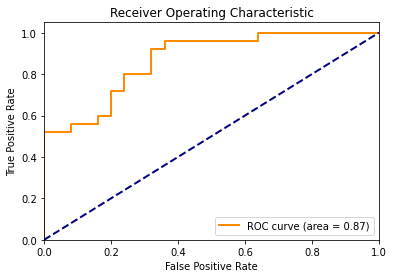

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  
  path = '/content/' + fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  #plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=2)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is likely injured")
  else:
    print(fn + " is likely intact")
 

Saving 5.jpg to 5.jpg


NameError: ignored

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)